# Install and load packages

In [1]:
install.packages("tidyverse")
install.packages('pastecs')


The downloaded binary packages are in
	/var/folders/6g/gw1h2q0n39bbrw_h7wtp6f680000gn/T//RtmpnI91dI/downloaded_packages

The downloaded binary packages are in
	/var/folders/6g/gw1h2q0n39bbrw_h7wtp6f680000gn/T//RtmpnI91dI/downloaded_packages


In [2]:
library(tidyverse)
library(pastecs)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘pastecs’


The following objects are masked from ‘package:dplyr’:

    first, last


The following object is masked from ‘package:tidyr’:

    extract




# ETL process
## Extract the data from Github repo

In [3]:
data = read.csv("https://raw.githubusercontent.com/andrealicialo/salphen/main/data.csv")
head(data)

,code,Day,Sample,pH,Ammonium,Nitrite,Nitrate
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,KCA100,0,CONTROL,8.8733,1.1962,0.0913,0.1363
2,KCA101,0,CONTROL,8.6633,1.2687,0.4800,0.1053
3,KCA102,0,CONTROL,9.2667,0.9064,0.0993,0.2139
4,KCA115,8,CONTROL,9.1200,1.9933,1.9823,0.0642
5,KCA116,8,CONTROL,9.1833,1.9208,3.8186,0.0478
6,KCA117,8,CONTROL,9.1600,2.1382,2.5690,0.0677


## Transform the data
We are going to tranform the data from wide to long format for plotting purposes (barplot, boxplot, lineplot, etc.)

In [4]:
#pivot the data frame into a long format
data_long = data %>% pivot_longer(cols=c('pH','Ammonium','Nitrite','Nitrate'),
                    names_to='Variable',
                    values_to='Value')
head(data_long)

# Specify the levels of the factor "variable" to pH > Ammonium > Nitrite > Nitrate. 
# This will come to use for plotting
data_long$Variable <- factor(data_long$Variable, levels = c("pH", "Ammonium", "Nitrite","Nitrate"))

code,Day,Sample,Variable,Value
<chr>,<int>,<chr>,<chr>,<dbl>
KCA100,0,CONTROL,pH,8.8733
KCA100,0,CONTROL,Ammonium,1.1962
KCA100,0,CONTROL,Nitrite,0.0913
KCA100,0,CONTROL,Nitrate,0.1363
KCA101,0,CONTROL,pH,8.6633
KCA101,0,CONTROL,Ammonium,1.2687


# Data analysis
## General descriptive statistics

In [5]:
round(stat.desc(data %>% select_if(is.double)),4)

,pH,Ammonium,Nitrite,Nitrate
,<dbl>,<dbl>,<dbl>,<dbl>
nbr.val,186.0000,186.0000,186.0000,186.0000
nbr.null,0.0000,0.0000,35.0000,10.0000
nbr.na,0.0000,0.0000,0.0000,0.0000
min,6.0100,0.3267,0.0000,0.0000
max,9.3300,7.0655,76.4938,8.0043
range,3.3200,6.7388,76.4938,8.0043
sum,1548.7077,270.4428,2504.1763,153.4380
median,8.5630,1.2014,2.0416,0.2116
mean,8.3264,1.4540,13.4633,0.8249


Nitrite is the response variable with the greatest dispersion throughout the study (240 days), we can see that it has a standard deviation = 19.73, compared to Ammonium = 1.24 and Nitrate = 1.41. The range of Nitrite is approximately 10 times wider than that of Ammonium and Nitrate, as well as the confidence interval with respect to the mean is much wider.

### Histogram and normality test
Histograms are good for showing general distributional features of dataset variables. You can see roughly where the peaks of the distribution are, whether the distribution is skewed or symmetric, and if there are any outliers.

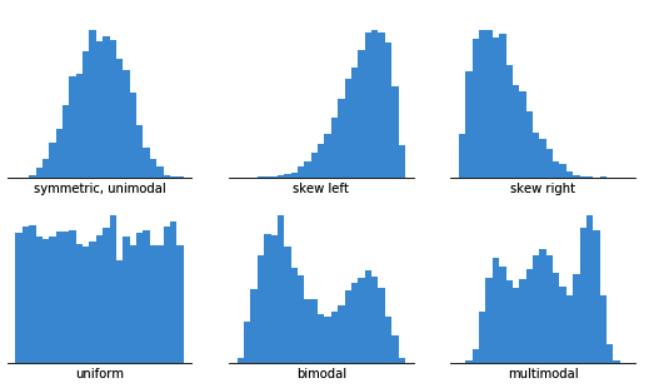

For a formal statistical test, perfom a Shapiro Wilk test: if the p-value of the test is greater than α = .05, then the data is assumed to be normally distributed.

Also, we are going to test for unimodality or multimodality of data.

In [6]:
install.packages("diptest")
library(diptest)

install.packages("LaplacesDemon")
library(LaplacesDemon)

install.packages("mousetrap")
library(mousetrap)


The downloaded binary packages are in
	/var/folders/6g/gw1h2q0n39bbrw_h7wtp6f680000gn/T//RtmpnI91dI/downloaded_packages

The downloaded binary packages are in
	/var/folders/6g/gw1h2q0n39bbrw_h7wtp6f680000gn/T//RtmpnI91dI/downloaded_packages



Attaching package: ‘LaplacesDemon’


The following object is masked from ‘package:purrr’:

    partial





The downloaded binary packages are in
	/var/folders/6g/gw1h2q0n39bbrw_h7wtp6f680000gn/T//RtmpnI91dI/downloaded_packages


Welcome to mousetrap 3.2.1!

Summary of recent changes: http://pascalkieslich.github.io/mousetrap/news/

Forum for questions: https://forum.cogsci.nl/index.php?p=/categories/mousetrap



$shapiroWilk

	Shapiro-Wilk normality test

data:  x
W = 0.90828, p-value = 2.418e-09


$hartigansTest

	Hartigans' dip test for unimodality / multimodality

data:  x
D = 0.062933, p-value = 9.8e-06
alternative hypothesis: non-unimodal, i.e., at least bimodal


$unimodality
[1] FALSE

$multimodality
[1] TRUE

$bimodalityCoeff
[1] 0.5441418

$bimodality
[1] TRUE


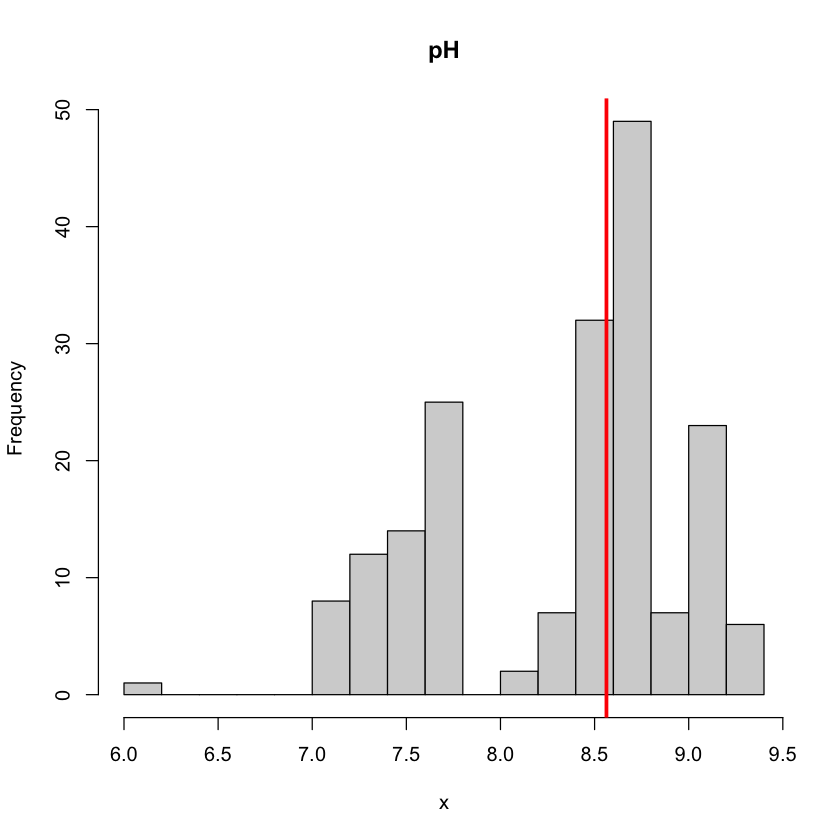

$shapiroWilk

	Shapiro-Wilk normality test

data:  x
W = 0.79625, p-value = 7.805e-15


$hartigansTest

	Hartigans' dip test for unimodality / multimodality

data:  x
D = 0.034136, p-value = 0.1309
alternative hypothesis: non-unimodal, i.e., at least bimodal


$unimodality
[1] FALSE

$multimodality
[1] TRUE

$bimodalityCoeff
[1] 0.6158761

$bimodality
[1] TRUE


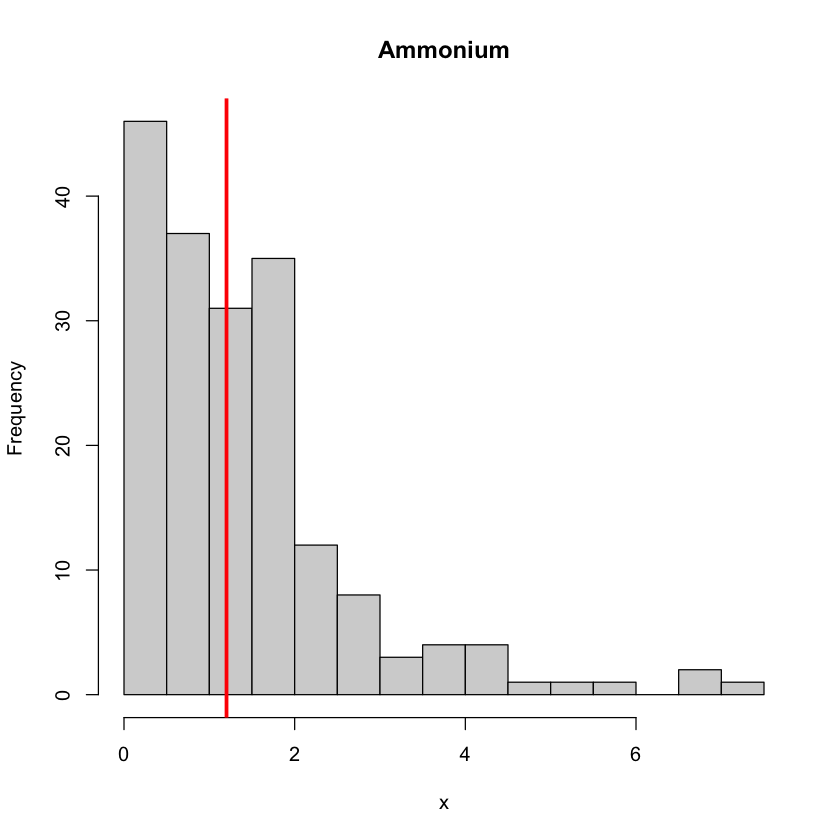

$shapiroWilk

	Shapiro-Wilk normality test

data:  x
W = 0.70934, p-value < 2.2e-16


$hartigansTest

	Hartigans' dip test for unimodality / multimodality

data:  x
D = 0.069676, p-value = 2.828e-06
alternative hypothesis: non-unimodal, i.e., at least bimodal


$unimodality
[1] FALSE

$multimodality
[1] TRUE

$bimodalityCoeff
[1] 0.7418454

$bimodality
[1] FALSE


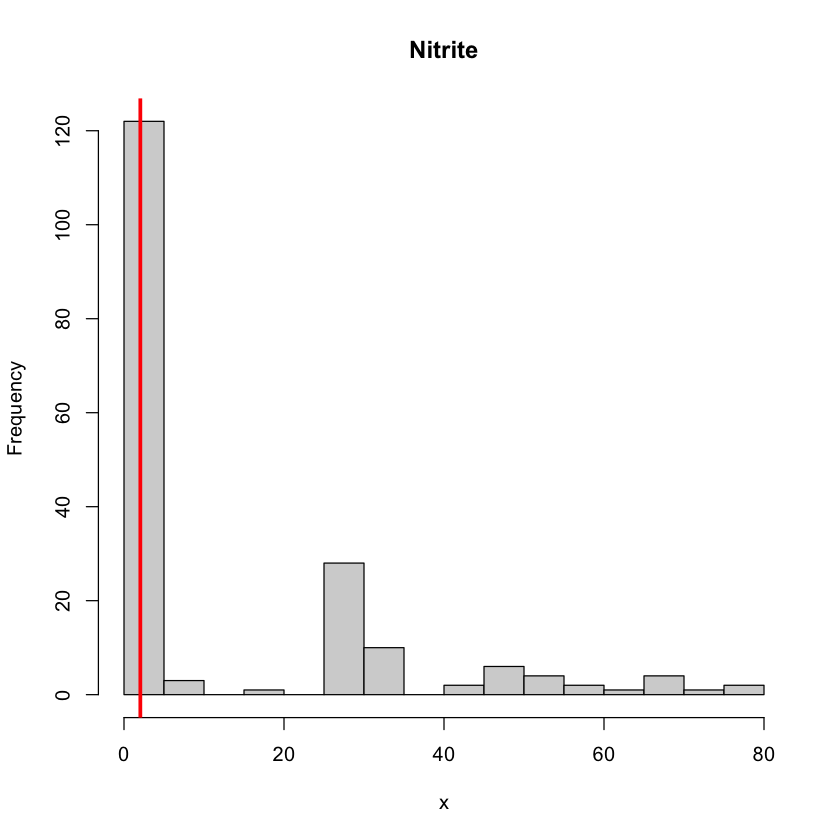

$shapiroWilk

	Shapiro-Wilk normality test

data:  x
W = 0.5972, p-value < 2.2e-16


$hartigansTest

	Hartigans' dip test for unimodality / multimodality

data:  x
D = 0.032523, p-value = 0.1797
alternative hypothesis: non-unimodal, i.e., at least bimodal


$unimodality
[1] FALSE

$multimodality
[1] TRUE

$bimodalityCoeff
[1] 0.7550324

$bimodality
[1] TRUE


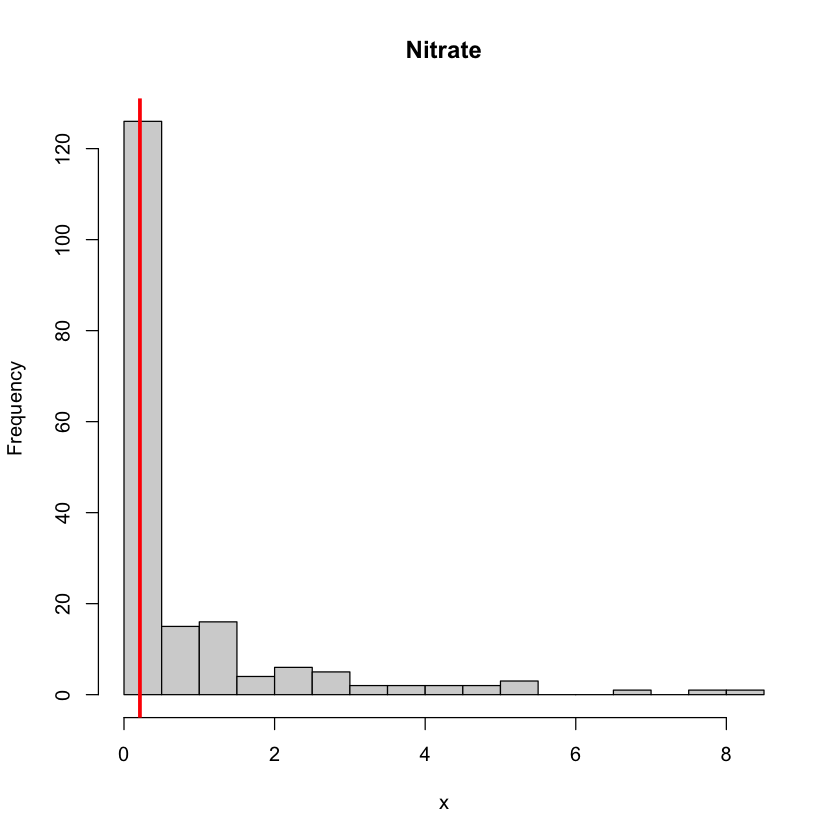

In [7]:
# We create a function to perform the task in whatever continous variable we indicate

normality <- function(x, title) {
    hist(x, breaks = 20, main = title)                    
    abline(v = median(x), col = "red", lwd = 3)

return(list(shapiroWilk = shapiro.test(x),
            hartigansTest = dip.test(x),
            unimodality = is.unimodal(x),
            multimodality = is.multimodal(x),
            bimodalityCoeff =bimodality_coefficient(x),
            bimodality = is.bimodal(x)))

}

# If bimodality coefficient is larger than 0.555 (stated in Pfister et al., 2013), 
# it indicates bimodality of data.

normality(data$pH, title = "pH")
normality(data$Ammonium, title = "Ammonium")
normality(data$Nitrite, title = "Nitrite")
normality(data$Nitrate, title = "Nitrate")

All the variables were multimodal and none is normal distributed.

## Specific descriptive statistics for each point in time and treatment

We are going to use stat.desc() to know descriptive statistics like mean, median, range, standard deviation and confidence interval for the mean in every scenario in time.

In [8]:
report = by(data %>% select_if(is.double), list(data$Day,data$Sample), stat.desc) # To summary statistics grouped by Day and Sample

In [9]:
report

: 0
: CONTROL
                      pH   Ammonium    Nitrite     Nitrate
nbr.val       6.00000000 6.00000000 6.00000000 6.000000000
nbr.null      0.00000000 0.00000000 0.00000000 0.000000000
nbr.na        0.00000000 0.00000000 0.00000000 0.000000000
min           8.66330000 0.90640000 0.09130000 0.105300000
max           9.26670000 1.26870000 0.48000000 0.213900000
range         0.60340000 0.36230000 0.38870000 0.108600000
sum          53.60660000 6.74260000 1.34120000 0.911000000
median        8.87330000 1.19620000 0.09930000 0.136300000
mean          8.93443333 1.12376667 0.22353333 0.151833333
SE.mean       0.11184862 0.07000025 0.08111503 0.020426954
CI.mean.0.95  0.28751603 0.17994137 0.20851283 0.052509157
var           0.07506068 0.02940021 0.03947789 0.002503563
std.dev       0.27397205 0.17146490 0.19869044 0.050035614
coef.var      0.03066474 0.15258051 0.88886269 0.329543012
------------------------------------------------------------ 
: 8
: CONTROL
                       pH

We got a list of dataframes, we can acces each dataframe knowing the columns and rows, for example to see the descriptive statistics of treatment NiSA15 at 30 days, we run the next line:

In [10]:
report[['30','NiSA15']]

,pH,Ammonium,Nitrite,Nitrate
,<dbl>,<dbl>,<dbl>,<dbl>
nbr.val,3.000000000,3.000000000,3.000000,3.00000000
nbr.null,0.000000000,0.000000000,0.000000,0.00000000
nbr.na,0.000000000,0.000000000,0.000000,0.00000000
min,8.676700000,0.326700000,0.476400,0.10450000
max,8.826700000,0.399100000,32.285100,0.27430000
range,0.150000000,0.072400000,31.808700,0.16980000
sum,26.273400000,1.052500000,33.632000,0.60660000
median,8.770000000,0.326700000,0.870500,0.22780000
mean,8.757800000,0.350833333,11.210667,0.20220000


If we want to see the descriptive statistics of all the treatments at 30 days, we run the next line:

In [11]:
report['30',]

,pH,Ammonium,Nitrite,Nitrate
,<dbl>,<dbl>,<dbl>,<dbl>
nbr.val,6.00000000,6.0000000,6.0000000,6.000000000
nbr.null,0.00000000,0.0000000,0.0000000,0.000000000
nbr.na,0.00000000,0.0000000,0.0000000,0.000000000
min,8.51670000,0.3991000,1.2645000,0.107300000
max,8.84670000,1.1962000,2.0494000,0.221100000
range,0.33000000,0.7971000,0.7849000,0.113800000
sum,51.98680000,4.8584000,10.7110000,0.935800000
median,8.63000000,0.8339000,2.0416000,0.139500000
mean,8.66446667,0.8097333,1.7851667,0.155966667


If we want to see the descriptive statistics of 1 treatment at all times, we run the next line:

In [12]:
report[,'NiSA15']

,pH,Ammonium,Nitrite,Nitrate
,<dbl>,<dbl>,<dbl>,<dbl>
nbr.val,3.00000000,3.0000000,3.0000000,3.000000000
nbr.null,0.00000000,0.0000000,0.0000000,0.000000000
nbr.na,0.00000000,0.0000000,0.0000000,0.000000000
min,8.56000000,1.6310000,0.4550000,0.046500000
max,9.08670000,2.7179000,3.4261000,0.140700000
range,0.52670000,1.0869000,2.9711000,0.094200000
sum,26.66670000,6.3422000,5.7967000,0.287500000
median,9.02000000,1.9933000,1.9156000,0.100300000
mean,8.88890000,2.1140667,1.9322333,0.095833333


# Plots
Let's create some plots, we are going to use data_long (long format)

## Boxplot
We will create boxplots for each treatment in the 7 times. In this way we can see the dispersion with respect to the independent variable that are the days and the indicators Ammonium, Nitrite, Nitrate and pH, which are the dependent variables.

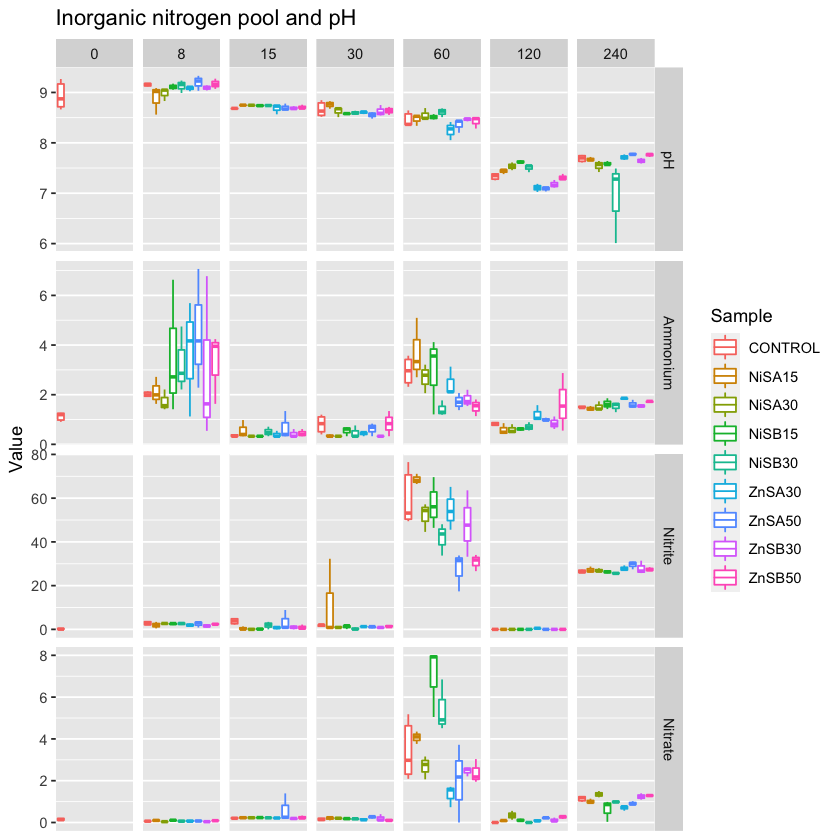

In [13]:
boxplot =
    ggplot(data_long, aes(x=Sample, y=Value, color=Sample)) +
    geom_boxplot() +
    facet_grid(Variable ~ Day, scales = 'free_y') +
    scale_x_discrete(NULL, breaks = NULL) +
    labs(title = "Inorganic nitrogen pool and pH")
boxplot

## Barplot

We will create a barplot of the means to see how the 4 variables responded in each treatment during the 240 days.

In [14]:
# We create a function to calculate the mean and the standard deviation for each group

# data : a data frame
# varname : the name of a column containing the variable to be summariezed
# groupnames : vector of column names to be used as
# grouping variables

data_summary <- function(data, varname, groupnames){
  require(plyr)
  summary_func <- function(x, col){
    c(mean = mean(x[[col]], na.rm=TRUE),
      sd = sd(x[[col]], na.rm=TRUE))
  }
  data_sum<-ddply(data, groupnames, .fun=summary_func,
                  varname)
  data_sum <- rename(data_sum, c("mean" = varname))
 return(data_sum)
}

We use the function created data_summary() to summarise the data

In [15]:
library(plyr); library(dplyr) # First we call this libraries
barplot_data = data_summary(data_long, varname="Value", 
                    groupnames=c("Day", "Sample","Variable"))

# Convert Day to a factor variable
barplot_data$Day=as.factor(barplot_data$Day)
barplot_data$Sample=as.factor(barplot_data$Sample)
head(barplot_data)

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:purrr’:

    compact




,Day,Sample,Variable,Value,sd
,<fct>,<fct>,<fct>,<dbl>,<dbl>
1,0,CONTROL,pH,8.9344333,0.27397205
2,0,CONTROL,Ammonium,1.1237667,0.17146490
3,0,CONTROL,Nitrite,0.2235333,0.19869044
4,0,CONTROL,Nitrate,0.1518333,0.05003561
5,8,CONTROL,pH,9.1544333,0.02863513
6,8,CONTROL,Ammonium,2.0174333,0.09900506


We have a data frame that groups the mean (Value) and the standard deviation (sd) by day (Day), treatment (Sample) and Variable (Ammonium, Nitrite, Nitrate). We are ready to plot a barplot :thumbsup

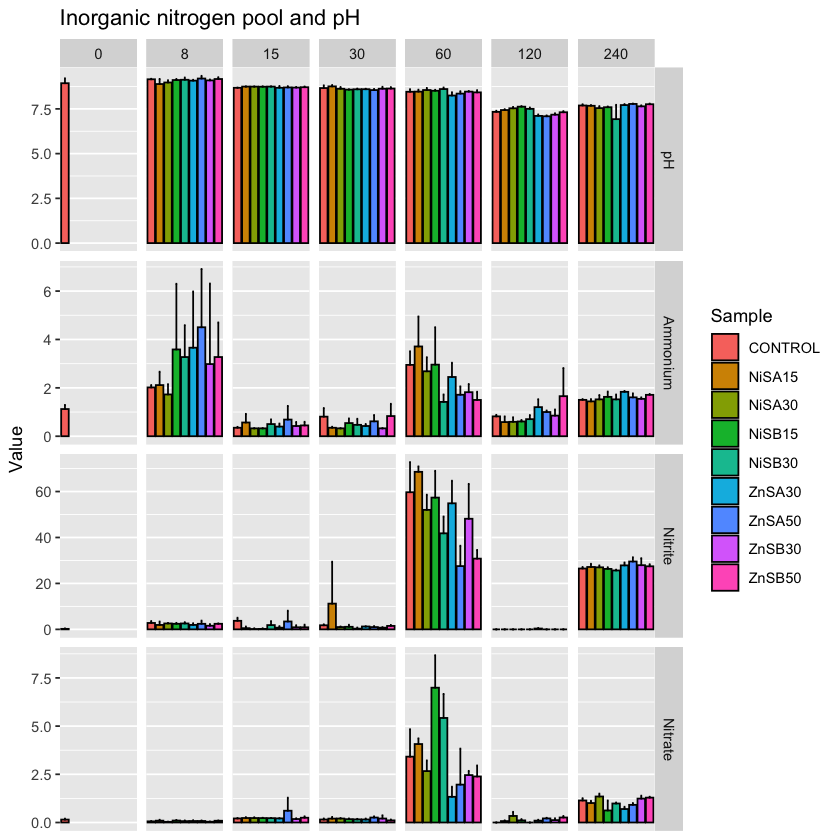

In [16]:
# library(ggplot2) 

barplot = 
    ggplot(barplot_data, aes(x=Sample, y=Value, fill=Sample)) + 
    geom_bar(stat="identity", color="black", position=position_dodge()) +
    geom_errorbar(aes(ymin=Value, ymax=Value+sd), width=.2,
                 position=position_dodge(.9)) +
    facet_grid(Variable ~ Day, scales = 'free_y') +
    scale_x_discrete(NULL, breaks = NULL) +
    labs(title="Inorganic nitrogen pool and pH", x="Sample", y = "Value")

barplot

## Lineplot

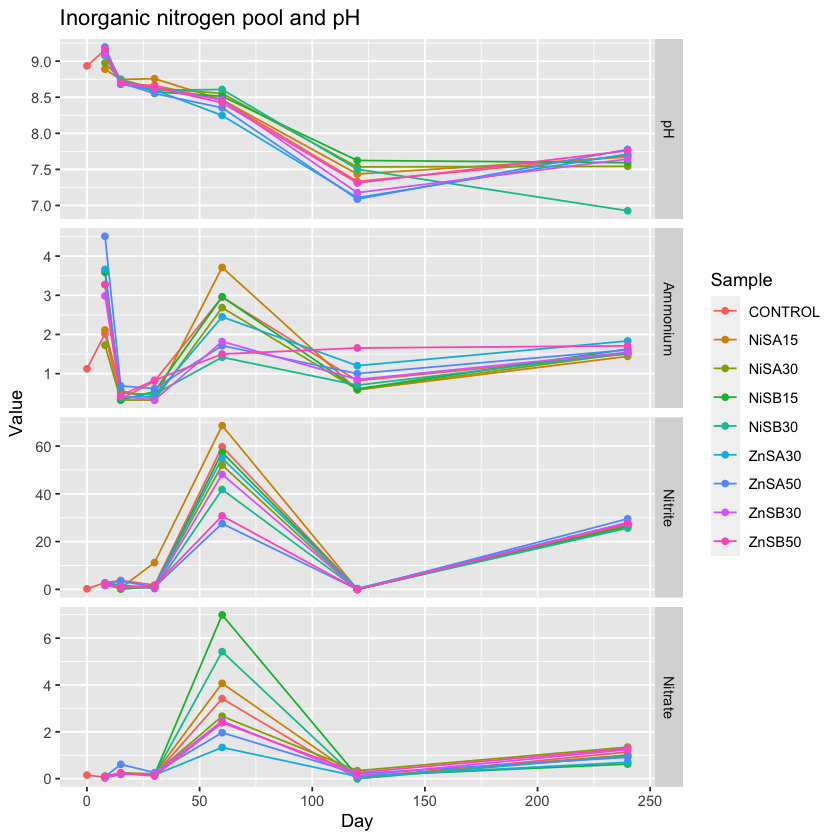

In [17]:
lineplot_data <- barplot_data
lineplot_data$Day <- as.numeric(as.vector(lineplot_data$Day)) # Format Day column to continuos
lineplot = 
    ggplot(lineplot_data, aes(x=Day, y=Value, group = Sample)) + 
    geom_line(aes(color=Sample)) +
    geom_point(aes(color=Sample)) +
    facet_grid(Variable~., scales = 'free_y') +
    labs(title="Inorganic nitrogen pool and pH", x="Day", y = "Value")

lineplot

## Diagnostic plots with Generalized Additive Model (GAM)
The world is not linear. This means Linear Regression will not always represent what we see in reality. Sometimes a linear relationship is a good enough estimate but often it isn’t. In this context, Generalised Additive Models (GAMs) are an adaptation that allows us to model non-linear data while maintaining explainability.

Based on Hartigan's dip test and Shapiro Wilk for normality before, we see that our 4 response variables are multimodal and nonparametric.

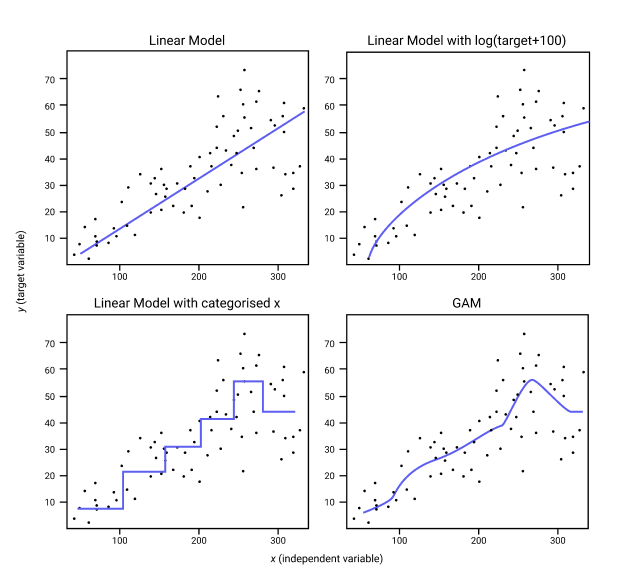

In GAMs, we drop the assumption that our target can be calculated using a linear combination of variables by simply saying we can use a non-linear combination of variables, denoted by s, for ‘smooth function’.

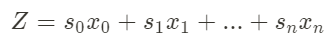

In addition, sometimes we observe that the variance is greater than the mean which is called overdispersion. The quasi-Poisson likelihood model is a simple remedy for overdispersed count data because it introduces a dispersion parameter (𝜙) into the Poisson model, so that the conditional variance of the response is now a linear function of the mean.

In [18]:
install.packages ("mgcv")


The downloaded binary packages are in
	/var/folders/6g/gw1h2q0n39bbrw_h7wtp6f680000gn/T//RtmpnI91dI/downloaded_packages


In [19]:
library(mgcv)

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.8-41. For overview type 'help("mgcv-package")'.


Attaching package: ‘mgcv’


The following objects are masked from ‘package:LaplacesDemon’:

    dmvn, rmvn




### Linear fit
We're going to run a linear fit on Nitrite, just to compare with the next non-linear fit.

In [20]:
mod_lm2 <- gam(Nitrite ~ pH + Ammonium + Nitrate, data=data, family = quasipoisson)
summary(mod_lm2)


Family: quasipoisson 
Link function: log 

Formula:
Nitrite ~ pH + Ammonium + Nitrate

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.67163    1.09040   6.119 5.65e-09 ***
pH          -0.62432    0.13896  -4.493 1.25e-05 ***
Ammonium     0.29681    0.06176   4.806 3.21e-06 ***
Nitrate      0.35859    0.03167  11.322  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


R-sq.(adj) =  0.317   Deviance explained = 52.4%
GCV = 12.697  Scale est. = 15.472    n = 186

It appears we have statistical effects for pH + Ammonium + Nitrate, and the adjusted R-squared suggests a 0.317 of the variance is accounted for.

### Non-linear fit
We will look for nonlinear effects for each covariate.

In [21]:
mod_gam2 <- gam(Nitrite ~ s(pH) + s(Ammonium) + s(Nitrate), data=data, family = quasipoisson)
summary(mod_gam2)


Family: quasipoisson 
Link function: log 

Formula:
Nitrite ~ s(pH) + s(Ammonium) + s(Nitrate)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.5542     0.1303   11.93   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
              edf Ref.df     F  p-value    
s(pH)       4.489  5.427 0.943 0.449686    
s(Ammonium) 4.171  5.153 4.517 0.000625 ***
s(Nitrate)  7.425  8.152 6.006 1.35e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =   0.89   Deviance explained = 86.8%
GCV = 4.0804  Scale est. = 8.3842    n = 186

We can note that this model accounts for much of the variance in Nitrite scores, with an adjusted R-squared of .89 vs 0.31 of the linear fit before. In short, it looks like the Ammonium and Nitrate resources of a microcosmos are associated with Nitrite scores, even if we don’t really need the pH index in the model.

#### 3D graph
It may not be obvious at all, but one can utilize smooths of more than one variable, in effect, a smooth of the smooths of the variables that go into it. This is akin to an interaction in typical model settings. Let’s create a new model to play around with this feature. After fitting the model, I provide a visualization for comparison to the previous, as well as a 3D view.

In [22]:
mod_gam3 <- gam(Nitrite ~ te(Ammonium, Nitrate), data=data, family = quasipoisson)
summary(mod_gam3)


Family: quasipoisson 
Link function: log 

Formula:
Nitrite ~ te(Ammonium, Nitrate)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.2781     0.1156   11.06   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                       edf Ref.df     F p-value    
te(Ammonium,Nitrate) 21.02  22.24 28.02  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.928   Deviance explained = 91.6%
GCV = 2.7495  Scale est. = 3.2891    n = 186

In [23]:
install.packages("visreg")


The downloaded binary packages are in
	/var/folders/6g/gw1h2q0n39bbrw_h7wtp6f680000gn/T//RtmpnI91dI/downloaded_packages


In [24]:
library(visreg)

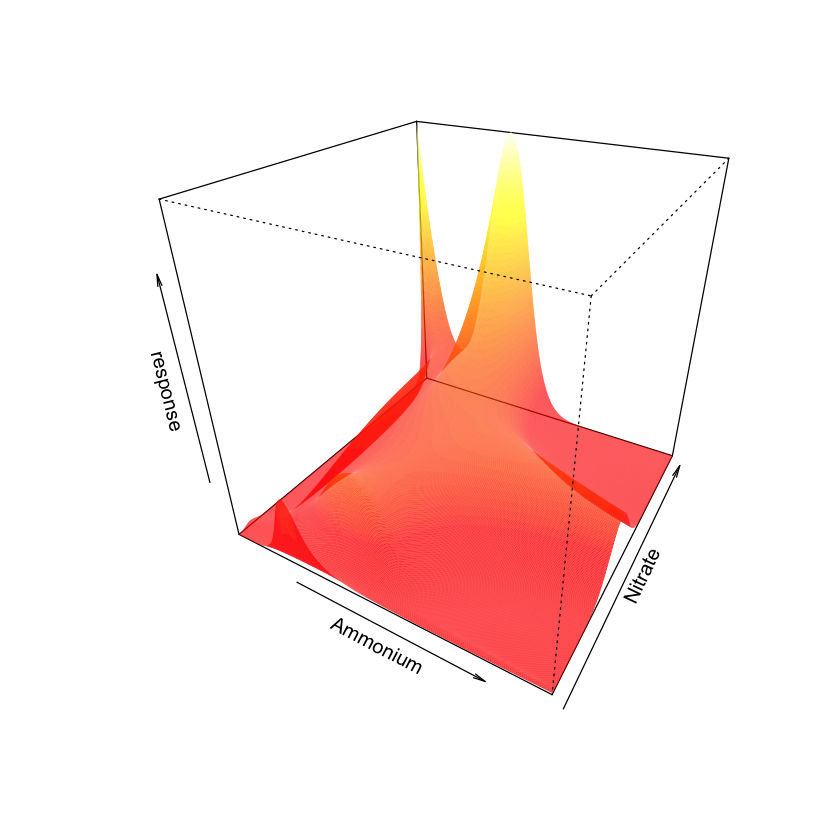

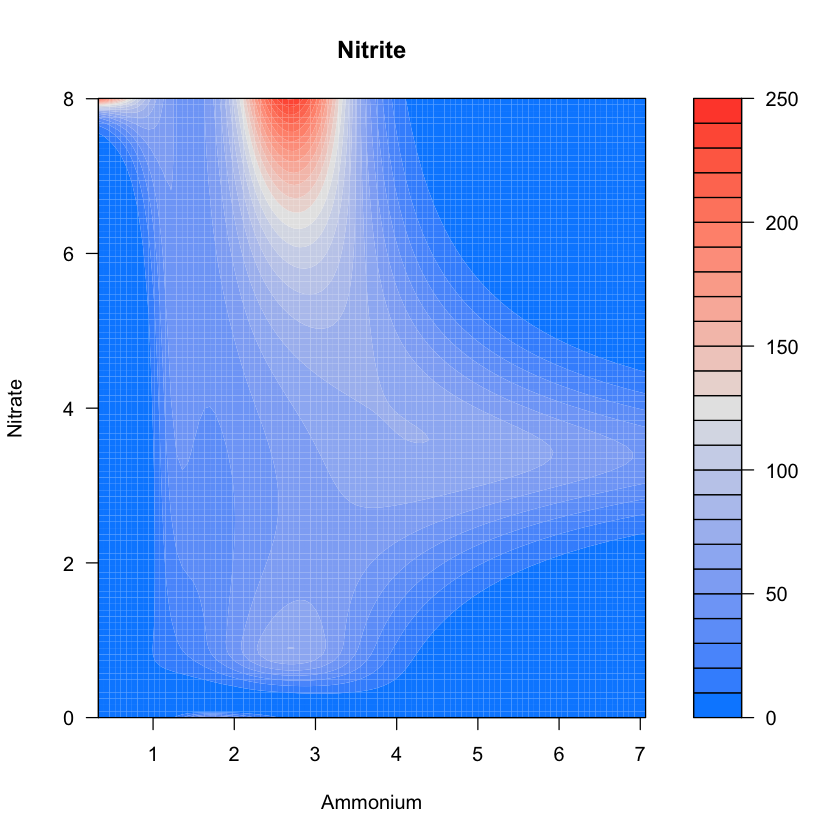

In [25]:
vis.gam(mod_gam3, type='response', plot.type='persp',
        phi=30, theta=30, n.grid=500, border=NA)
visreg2d(mod_gam3, xvar='Ammonium', yvar='Nitrate', scale='response')

In the above (first graph) we are using a type of smooth called a tensor product smooth, and by smoothing the marginal smooths of Ammonium and Nitrate, we see a bit clearer story. As we might suspect, microcosmos with more of an apparent Nitrate and medium Ammonium are going to score higher on the Nitrite concentration. However, Ammonium alone does not necessarily guarantee higher Nitrite concentration (note the dark bottom right corner on the contour plot), though without at least moderate Ammonium hopes are fairly dim for a decent concentration of Nitrite.

# Inferencial statistics
## Kruskal-Wallis test for non parametric data
We're going to analyze every variable response to look for differences between samples over time.

In [26]:
kruskal.test(pH ~ paste(data$Day,data$Sample), data = data)


	Kruskal-Wallis rank sum test

data:  pH by paste(data$Day, data$Sample)
Kruskal-Wallis chi-squared = 174.78, df = 54, p-value = 1.175e-14


As the p-value is less than the significance level 0.05, we can conclude that there are significant differences between the treatment groups over time.

## Post-hoc test
### Pairwise Mann–Whitney U-tests

In [27]:
pw = pairwise.wilcox.test(data$pH, paste(data$Day,data$Sample),
                 p.adjust.method = "none")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
W

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
W

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
W

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
W

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
W

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
W

If there are several values to compare, it can be beneficial to have R convert this table to a compact letter display for you.  The multcompLetters function in the multcompView package can do this, but first the table of p-values must be converted to a full table.

In [28]:
# install package
install.packages("multcompView")
install.packages("rcompanion")


The downloaded binary packages are in
	/var/folders/6g/gw1h2q0n39bbrw_h7wtp6f680000gn/T//RtmpnI91dI/downloaded_packages

The downloaded binary packages are in
	/var/folders/6g/gw1h2q0n39bbrw_h7wtp6f680000gn/T//RtmpnI91dI/downloaded_packages


In [29]:
library(multcompView)
library(rcompanion)

In [30]:
pwv = pw$p.value
pwv2 = fullPTable(pwv)
pwv2

,0 CONTROL,120 CONTROL,120 NiSA15,120 NiSA30,120 NiSB15,120 NiSB30,120 ZnSA30,120 ZnSA50,120 ZnSB30,120 ZnSB50,⋯,60 ZnSB50,8 CONTROL,8 NiSA15,8 NiSA30,8 NiSB15,8 NiSB30,8 ZnSA30,8 ZnSA50,8 ZnSB30,8 ZnSB50
0 CONTROL,1.000000000,0.004624229,0.02623944,0.02623944,0.02623944,0.02623944,0.02623944,0.02623944,0.02623944,0.02623944,⋯,0.02623944,0.373417050,0.89597775,0.89597775,0.51329193,0.51329193,0.51329193,0.23931654,0.51329193,0.23931654
120 CONTROL,0.004624229,1.000000000,0.08919242,0.02623944,0.02623944,0.02623944,0.02623944,0.02623944,0.08919242,0.89597775,⋯,0.02623944,0.004624229,0.02623944,0.02623944,0.02623944,0.02623944,0.02623944,0.02623944,0.02623944,0.02623944
120 NiSA15,0.026239441,0.089192418,1.00000000,0.40000000,0.10000000,0.40000000,0.10000000,0.10000000,0.10000000,0.20000000,⋯,0.10000000,0.026239441,0.10000000,0.10000000,0.10000000,0.10000000,0.10000000,0.10000000,0.10000000,0.10000000
120 NiSA30,0.026239441,0.026239441,0.40000000,1.00000000,0.20000000,1.00000000,0.10000000,0.10000000,0.10000000,0.10000000,⋯,0.10000000,0.026239441,0.10000000,0.10000000,0.10000000,0.10000000,0.10000000,0.10000000,0.10000000,0.10000000
120 NiSB15,0.026239441,0.026239441,0.10000000,0.20000000,1.00000000,0.10000000,0.10000000,0.10000000,0.10000000,0.10000000,⋯,0.10000000,0.026239441,0.10000000,0.10000000,0.10000000,0.10000000,0.10000000,0.10000000,0.10000000,0.10000000
120 NiSB30,0.026239441,0.026239441,0.40000000,1.00000000,0.10000000,1.00000000,0.10000000,0.10000000,0.10000000,0.10000000,⋯,0.10000000,0.026239441,0.10000000,0.10000000,0.10000000,0.10000000,0.10000000,0.10000000,0.10000000,0.10000000
120 ZnSA30,0.026239441,0.026239441,0.10000000,0.10000000,0.10000000,0.10000000,1.00000000,1.00000000,0.70000000,0.10000000,⋯,0.10000000,0.026239441,0.10000000,0.10000000,0.10000000,0.10000000,0.10000000,0.10000000,0.10000000,0.10000000
120 ZnSA50,0.026239441,0.026239441,0.10000000,0.10000000,0.10000000,0.10000000,1.00000000,1.00000000,0.20000000,0.10000000,⋯,0.10000000,0.026239441,0.10000000,0.10000000,0.10000000,0.10000000,0.10000000,0.10000000,0.10000000,0.10000000
120 ZnSB30,0.026239441,0.089192418,0.10000000,0.10000000,0.10000000,0.10000000,0.70000000,0.20000000,1.00000000,0.10000000,⋯,0.10000000,0.026239441,0.10000000,0.10000000,0.10000000,0.10000000,0.10000000,0.10000000,0.10000000,0.10000000
120 ZnSB50,0.026239441,0.895977753,0.20000000,0.10000000,0.10000000,0.10000000,0.10000000,0.10000000,0.10000000,1.00000000,⋯,0.10000000,0.026239441,0.10000000,0.10000000,0.10000000,0.10000000,0.10000000,0.10000000,0.10000000,0.10000000


In [31]:
letters = multcompLetters(pwv,
                compare="<",
                threshold=0.05,
                Letters=letters,
                reversed = FALSE)
letters

                                              120 CONTROL 
                                                "abcdefg" 
                                               120 NiSA15 
                                                      "h" 
                                               120 NiSA30 
                                                "ijklmno" 
                                               120 NiSB15 
                                          "ijklmnopqrstu" 
                                               120 NiSB30 
                                          "ijklmnopqrstu" 
                                               120 ZnSA30 
                                                "ijklmno" 
                                               120 ZnSA50 
                                                "ijklmno" 
                                               120 ZnSB30 
                                               "hijklmno" 
                                               120 ZnSB5

# Multivariate analysis

In [32]:
# Comment the next lines if the package is already installed
install.packages("plotly")
install.packages("ggfortify")


The downloaded binary packages are in
	/var/folders/6g/gw1h2q0n39bbrw_h7wtp6f680000gn/T//RtmpnI91dI/downloaded_packages

The downloaded binary packages are in
	/var/folders/6g/gw1h2q0n39bbrw_h7wtp6f680000gn/T//RtmpnI91dI/downloaded_packages


In [33]:
# Load the packages
library(plotly)
library(ggfortify)


Attaching package: ‘plotly’


The following objects are masked from ‘package:plyr’:

    arrange, mutate, rename, summarise


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




## Prepare the data for multivariate analysis

In [34]:
df <- data[, c("Day","pH", "Ammonium", "Nitrite", "Nitrate")]
df <- as.matrix(df)
head(df)

Day,pH,Ammonium,Nitrite,Nitrate
0,8.8733,1.1962,0.0913,0.1363
0,8.6633,1.2687,0.4800,0.1053
0,9.2667,0.9064,0.0993,0.2139
8,9.1200,1.9933,1.9823,0.0642
8,9.1833,1.9208,3.8186,0.0478
8,9.1600,2.1382,2.5690,0.0677


In [35]:
# Matrix for pca at 60 days
df60 <- subset(data[, c("pH", "Ammonium", "Nitrite", "Nitrate")],data[,"Day"] == 60)
df60 <- as.matrix(df60)
head(df60)

# Dataframe to group data
data60 <- subset(data,data[,"Day"]== 60)
head(data60)

,pH,Ammonium,Nitrite,Nitrate
49,8.6433,3.5706,76.4938,5.1796
50,8.3667,2.9647,53.1759,2.9772
51,8.3600,2.3187,49.4574,2.0904
52,8.5300,5.0961,68.1463,3.7614
53,8.3377,2.7032,66.4658,4.3501
54,8.5267,3.3340,71.1338,4.0973


,code,Day,Sample,pH,Ammonium,Nitrite,Nitrate
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
49,KCA196,60,CONTROL,8.6433,3.5706,76.4938,5.1796
50,KCA197,60,CONTROL,8.3667,2.9647,53.1759,2.9772
51,KCA198,60,CONTROL,8.3600,2.3187,49.4574,2.0904
52,KCA199,60,NiSA15,8.5300,5.0961,68.1463,3.7614
53,KCA200,60,NiSA15,8.3377,2.7032,66.4658,4.3501
54,KCA201,60,NiSA15,8.5267,3.3340,71.1338,4.0973


## PCA
PCA Visualization in ggplot2 with Plotly. ggfortify lets ggplot2 know how to interpret PCA objects. After loading ggfortify, you can use ggplot2::autoplot function for stats::prcomp and stats::princomp objects.

Positive correlated variables point to the same side of the plot. Negative correlated variables point to opposite sides of the graph.

### 60 days
In this notebook we will focus on analyzing the system at 60 days, because at this time the greatest variation of the 4 indicators between treatments was seen.

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



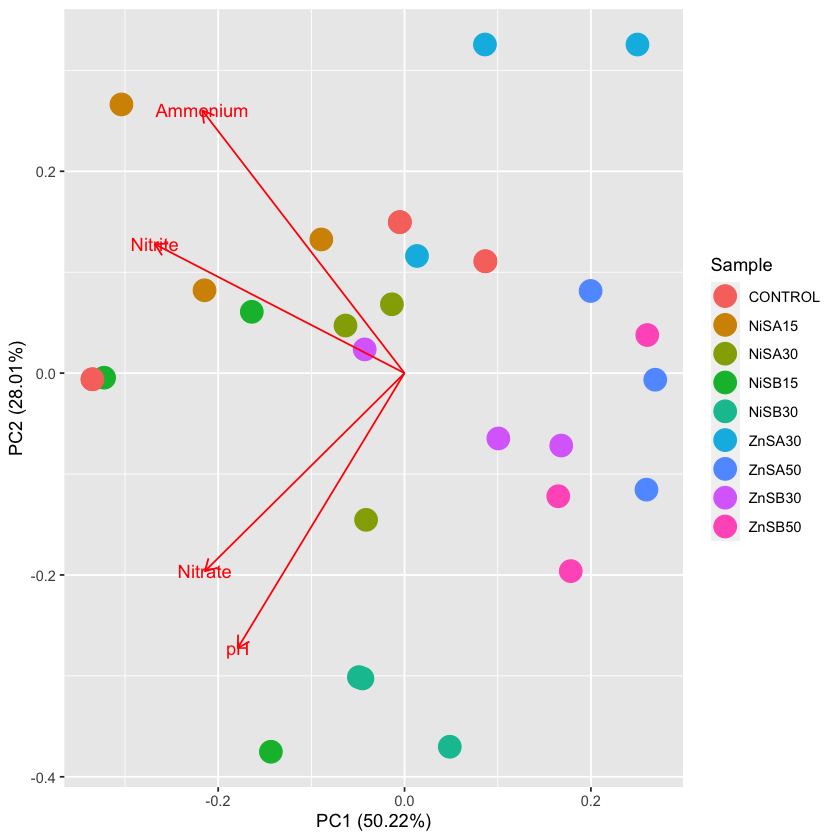

,eigenvalue,variance.percent,cumulative.variance.percent
,<dbl>,<dbl>,<dbl>
Dim.1,2.0086749,50.216873,50.21687
Dim.2,1.1205458,28.013645,78.23052
Dim.3,0.5570579,13.926447,92.15697
Dim.4,0.3137214,7.843035,100.00000


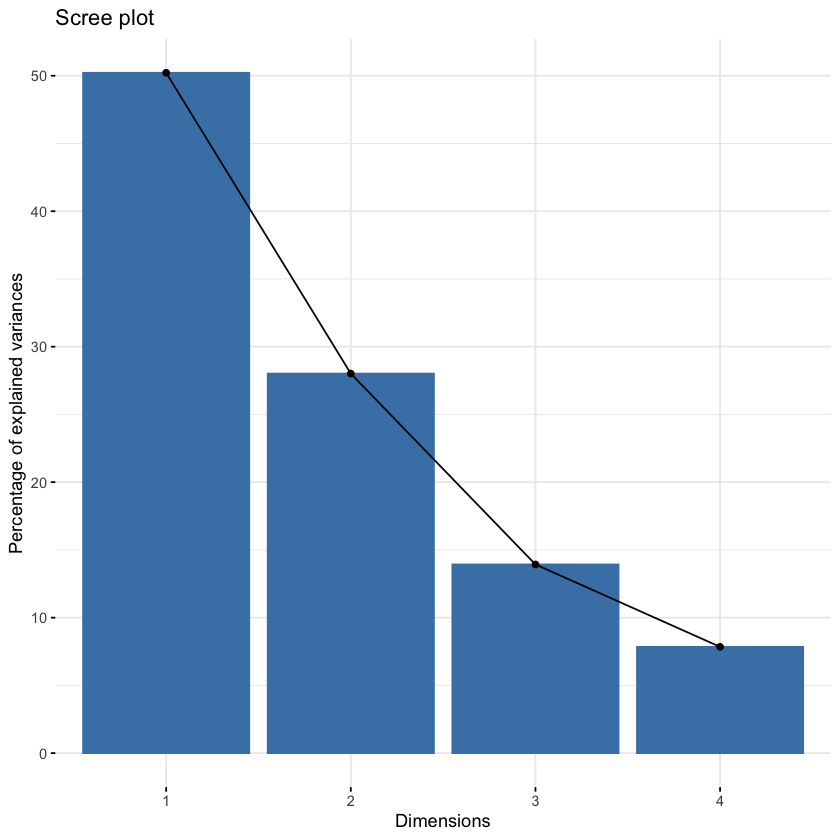

In [36]:
# Principal component analysis
pca <- prcomp(df60, scale. = TRUE)
# Plot
autoplot(pca, loadings = TRUE, loadings.label = TRUE,
         data = data60, colour = 'Sample', size = 6)

# install.packages("factoextra")
library(factoextra)
fviz_eig(pca)

# Access to pca results
eig.val <- get_eigenvalue(pca)
eig.val

In [37]:
summary(pca)

Importance of components:
                          PC1    PC2    PC3     PC4
Standard deviation     1.4173 1.0586 0.7464 0.56011
Proportion of Variance 0.5022 0.2801 0.1393 0.07843
Cumulative Proportion  0.5022 0.7823 0.9216 1.00000

,Dim.1,Dim.2,Dim.3,Dim.4
pH,-0.5716341,-0.6499043,-0.49359495,0.08498794
Ammonium,-0.6935842,0.6212660,-0.07477955,0.35689998
Nitrite,-0.8559154,0.3049327,-0.05141614,-0.41446494
Nitrate,-0.6842946,-0.4682039,0.55243671,0.08567181


,Dim.1,Dim.2,Dim.3,Dim.4
pH,16.26771,37.693737,43.7362037,2.302345
Ammonium,23.94907,34.444945,1.0038421,40.602139
Nitrite,36.47137,8.298094,0.4745682,54.755969
Nitrate,23.31184,19.563225,54.7853860,2.339547


,Dim.1,Dim.2,Dim.3,Dim.4
pH,0.3267655,0.42237558,0.243635973,0.007222950
Ammonium,0.4810590,0.38597138,0.005591982,0.127377598
Nitrite,0.7325913,0.09298394,0.002643620,0.171781190
Nitrate,0.4682591,0.21921489,0.305186314,0.007339659


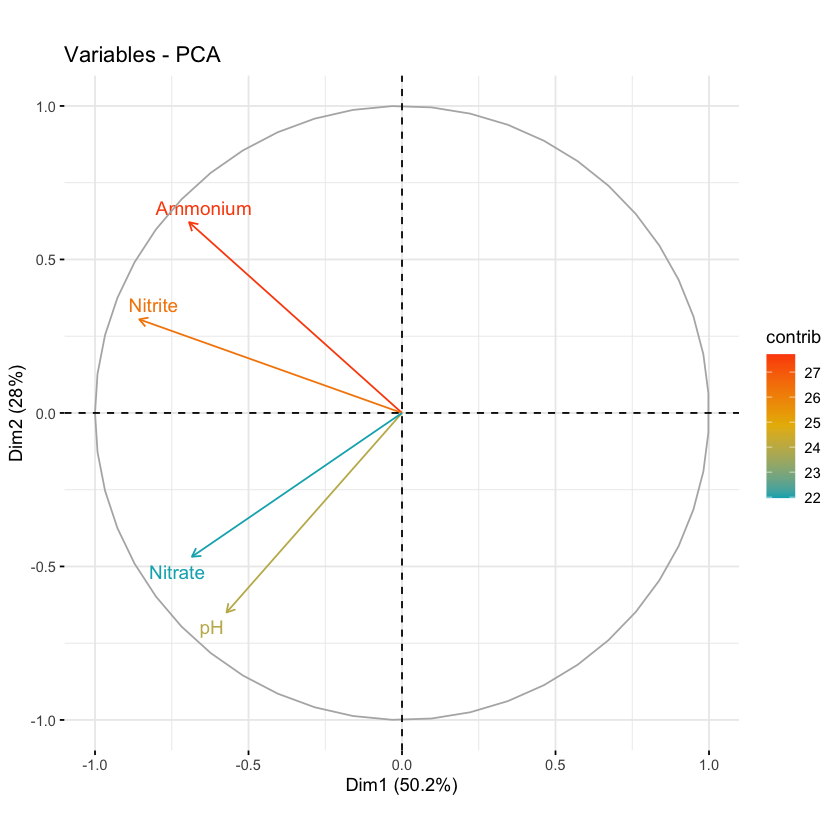

In [38]:
# Graph of variables
fviz_pca_var(pca,
             col.var = "contrib", # Color by contributions to the PC
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
             )

# Results for Variables
res.var <- get_pca_var(pca)
res.var$coord          # Coordinates
res.var$contrib        # Contributions to the PCs
res.var$cos2           # Quality of representation 

,Dim.1,Dim.2,Dim.3,Dim.4
49,-2.59955487,-0.03523849,-0.43600299,-0.17496911
50,-0.03918975,0.86764452,0.16947763,0.07985313
51,0.67336786,0.64266977,-0.05853215,-0.24123958
52,-2.35832049,1.54373729,-0.57480560,0.98937677
53,-0.69313700,0.76802162,0.80180598,-0.65207734
54,-1.66648091,0.47591700,-0.26211370,-0.28261554
55,-0.32040221,-0.84289502,-1.60083566,-0.29311997
56,-0.49207488,0.27339120,-0.31940876,-0.08736165
57,-0.10521182,0.39561536,-0.43761450,0.76245252
58,-2.50262382,-0.02623362,1.49421248,0.17408403


,Dim.1,Dim.2,Dim.3,Dim.4
49,11.214168205,0.003693887,1.13751559,0.32528000
50,0.002548673,2.239405781,0.17187123,0.06775143
51,0.752443424,1.228640671,0.02050063,0.61834625
52,9.229426961,7.089178705,1.97706247,10.40059107
53,0.797273353,1.754672313,3.84695408,4.51786058
54,4.608608032,0.673769854,0.41110984,0.84864623
55,0.170357043,2.113470145,15.33458114,0.91290464
56,0.401819931,0.222340304,0.61048089,0.08109167
57,0.018369534,0.465581193,1.14593987,6.17675268
58,10.393462057,0.002047225,13.35989783,0.32199749


,Dim.1,Dim.2,Dim.3,Dim.4
49,0.968199714,1.779105e-04,0.0272361621,0.0043862132
50,0.001945471,9.535938e-01,0.0363835042,0.0080772511
51,0.488566225,4.450353e-01,0.0036915399,0.0627069684
52,0.600997899,2.575219e-01,0.0357033757,0.1057768716
53,0.224672789,2.758412e-01,0.3006428641,0.1988431036
54,0.881013746,7.185292e-02,0.0217952298,0.0253381020
55,0.029655046,2.052365e-01,0.7402886586,0.0248198071
56,0.567686119,1.752326e-01,0.2391880846,0.0178931796
57,0.011770816,1.664270e-01,0.2036389927,0.6181631784
58,0.734523274,8.071063e-05,0.2618418938,0.0035541217


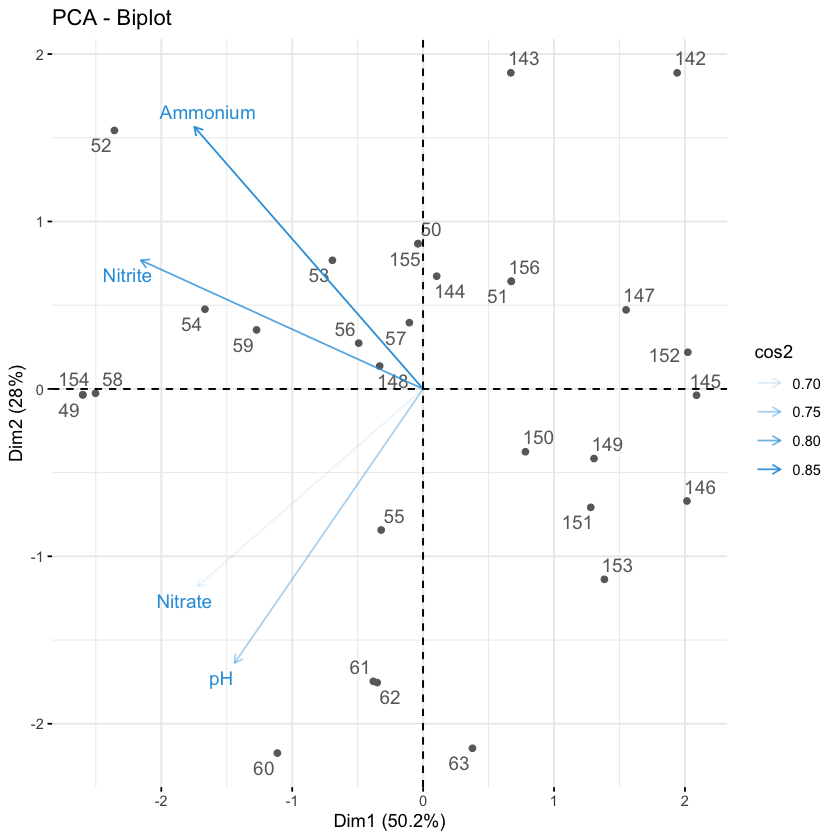

In [39]:
# Biplot of individuals and variables
fviz_pca_biplot(pca, repel = TRUE,
                col.var = "#2E9FDF",
                col.ind = "#696969",
                alpha.var = "cos2"
                )

# Results for individuals
res.ind <- get_pca_ind(pca)
res.ind$coord          # Coordinates
res.ind$contrib        # Contributions to the PCs
res.ind$cos2           # Quality of representation 

## Plotting k-means

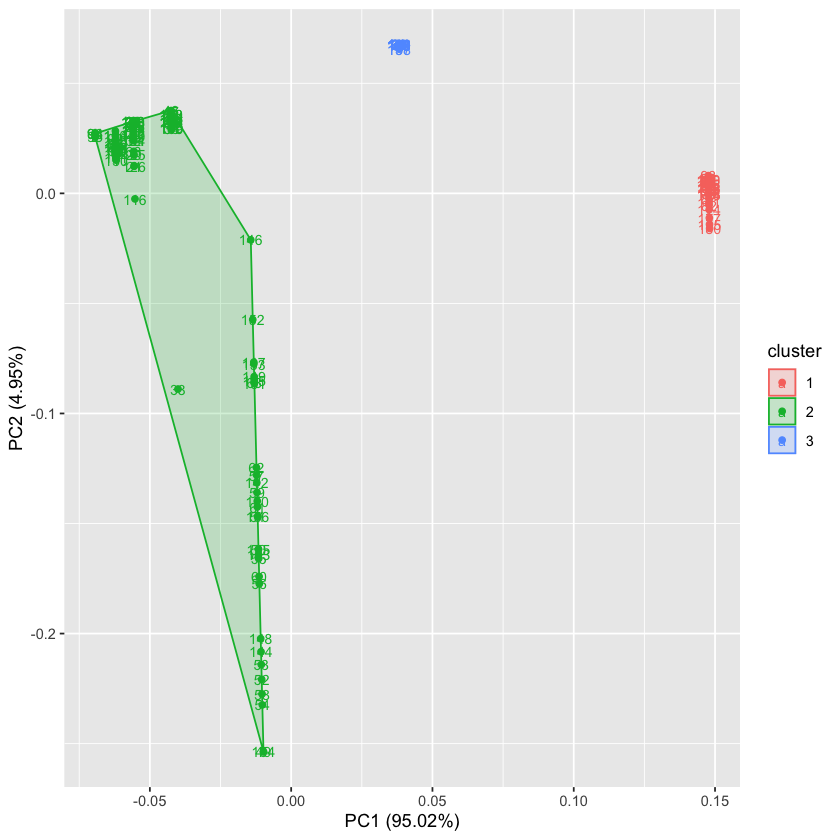

In [40]:
autoplot(kmeans(df,3), data = data,
         label = TRUE, label.size = 3, frame = TRUE)

## Heatmap

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



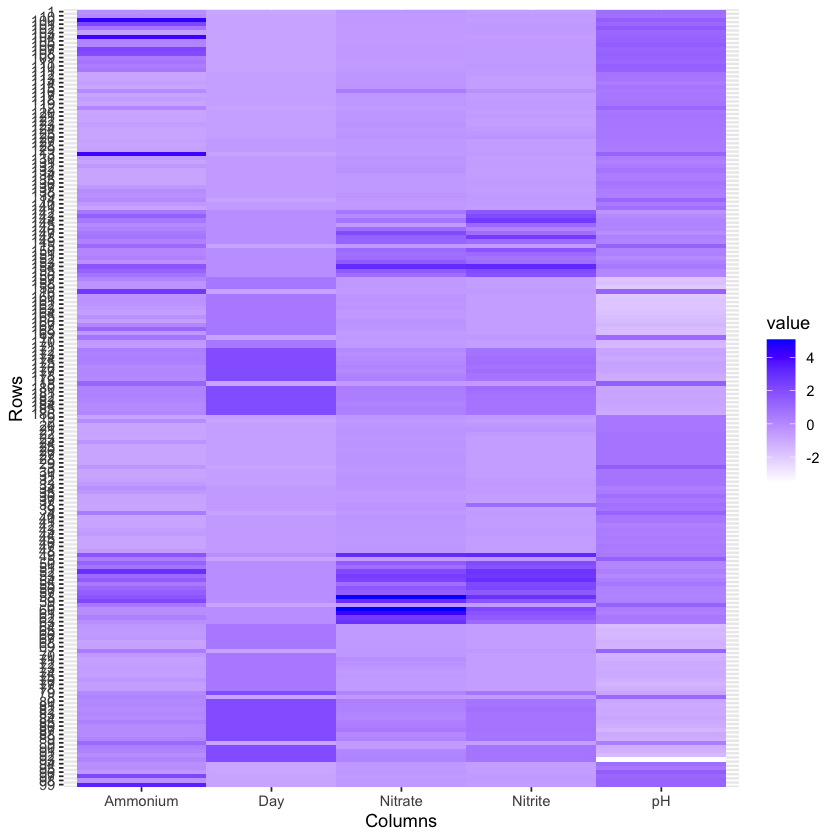

In [41]:
# Heatmap
autoplot(scale(df))